# Math 110A Homework 3

## Francisco Banuelos

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 1)

The Rosenbrock function :
$$ f(x,y)=(a-x)^2+b(y-x^2)^2 $$

is considered with $a=1$, $b=100$. Newton's method is used alongside backtracking starting at $(1.2,1.2)$ and $(-1.2,1)$.


In [62]:
a,b = 1,100    # parameters for Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])


In [63]:
def WolfeI(alpha,f,x,dx,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x[0]+alpha*p[0], x[1]+alpha*p[1])
    RHS = f(x[0],x[1])+c1*alpha*np.dot(dx,p)
    return LHS <= RHS

def approx_convergence_rate(path, minimizer, numToAvg=100, showPlot=False):
    '''Given a path defined by an iteration and a known minimizer, approximates convergence rate'''
    err = np.linalg.norm(path-np.array(minimizer),axis=1) # ||x_k-x*||=e_k
    
    # if converged in very few steps, return infinite order
    if len(err)<=3:
        return np.inf
    
    pp = np.zeros(len(err)-3)
    for i in range(len(err)-3):
        pp[i] = np.log(err[i+2]/err[i+1])/np.log(err[i+1]/err[i])
    
    if numToAvg>len(pp):
        # if not enough iterations to average, just average all
        p=np.mean(pp)
    else:
        # return mean of last few iterations
        p=np.mean(pp[-numToAvg:])
        
    # plot
    if showPlot:
        plt.plot(pp)
        plt.plot(pp*0+p)
        plt.xlabel('k')
        plt.ylabel('p')
        plt.title(f'p={p}')
        plt.show()
        
    return p

In [64]:
x,y = 1.2,1.2
path_NM = [[x,y]]
tol = 1e-7            
max_steps = 10000     
rho = 0.75            
i=0                 
dx = Df(x,y)          
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -np.linalg.solve(D2f(x,y),dx)
    
    # backtracking
    alpha = 1
    j=0
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        j+=1
        

    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_NM.append([xnew,ynew])
    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1
    
    print(f'In iteration {i}, alpha={a} after {j} backtracks, and newx={x}')

path_NM=np.array(path_NM)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

In iteration 1, alpha=1 after 0 backtracks, and newx=1.1959183673469387
In iteration 2, alpha=1 after 2 backtracks, and newx=1.0860802602485584
In iteration 3, alpha=1 after 0 backtracks, and newx=1.0608688670326778
In iteration 4, alpha=1 after 0 backtracks, and newx=1.0068651122729955
In iteration 5, alpha=1 after 0 backtracks, and newx=1.002529108862995
In iteration 6, alpha=1 after 0 backtracks, and newx=1.000009474292406
In iteration 7, alpha=1 after 0 backtracks, and newx=1.0000000120143648
After 7 iterations, approximate minimum is 1.4514660691522044e-16 at (1.0000000120143648, 1.0000000239391953)


In [65]:
# x0,y0=-1.2,1
x0,y0= -1.2,1

x,y = x0,y0
path_GD = [[x,y]]
tol = 1e-7            
max_steps = 10000     
rho = 0.75            
i=0                  
dx = Df(x,y)          
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -np.linalg.solve(D2f(x,y),dx)
    
    # backtracking
    alpha = 1
    j=0
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        j+=1
        

    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_GD.append([xnew,ynew])
    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1
    
    print(f'In iteration {i}, alpha={a} after {j} backtracks, and newx={x}')

path_GD=np.array(path_GD)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

In iteration 1, alpha=1 after 0 backtracks, and newx=-1.1752808988764043
In iteration 2, alpha=1 after 7 backtracks, and newx=-0.9165362974905651
In iteration 3, alpha=1 after 0 backtracks, and newx=-0.7843216969279168
In iteration 4, alpha=1 after 1 backtracks, and newx=-0.4866794444928646
In iteration 5, alpha=1 after 0 backtracks, and newx=-0.41079832110528114
In iteration 6, alpha=1 after 4 backtracks, and newx=-0.2033305328826341
In iteration 7, alpha=1 after 0 backtracks, and newx=-0.08757887975936021
In iteration 8, alpha=1 after 1 backtracks, and newx=0.1340931558171434
In iteration 9, alpha=1 after 0 backtracks, and newx=0.2094049859319681
In iteration 10, alpha=1 after 2 backtracks, and newx=0.41776098271141515
In iteration 11, alpha=1 after 0 backtracks, and newx=0.474962504158793
In iteration 12, alpha=1 after 2 backtracks, and newx=0.6534762188448886
In iteration 13, alpha=1 after 0 backtracks, and newx=0.6987159020598138
In iteration 14, alpha=1 after 2 backtracks, and ne

## 2) 

Consider the function $f(x)=\frac{1}{4}x^{4}-x^{2}+2x+4$. Using the single variable Newton's Method, we want to find the critical points $x^*$ such that $f'(x^*)=0$:

$$ x_{k+1}=x_{k}-\frac{f'(x_{k})}{f''(x_{k})}$$

In the code below, we start initial point at $x_{0}=0$. We see that Newton's method from this point jumps between $1$ and $0$ which is not a critical point of $f$ hence there is no convergence from this initial point. Newton with backtracking doesn't seem to converge or rather it converges very slowly. In fact, it very slowly increases even after 10000 iterations, the actual critical point is in the opposite direction. Thus, there is no convergence from this point.

In [37]:
f=lambda x: 1/4*x**4-x**2+2*x+4
df=lambda x: x**3-2*x+2
d2f=lambda x: 3*x**2-2



x =0  # initial point
path = [x]
print(f'Initial x={x}')
alpha = 1             # step size is 1 in Newton's method
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 1000      # Maximum number of steps to run the iteration
i=0                   # iteration count
dx = df(x)            # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = df(x)/d2f(x)  
    xnew = x - pk
    path.append(xnew)
    x = xnew
    dx = df(x)
    i += 1

path=np.array(path)
print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')
print(path)


Initial x=0
After 1000 iterations, approximate minimum is 4.0 at 0.0
[0. 1. 0. ... 0. 1. 0.]


In [53]:
## Backtracking for single variable function
def WolfeIS(alpha,f,x,df,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    p=df(x)
    LHS = f(x+alpha*p)
    RHS = f(x)-c1*alpha*pk**2
    return LHS <= RHS

In [58]:
x = 0
path_NM = [x]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
rho = 0.75            # rho for backtracking
i=0                   # iteration count
dx = df(x)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = dx
    
    # backtracking
    alpha = 1
    j=0
    while not WolfeIS(alpha,f,x,df,pk,c1=0.1) and alpha>1e-5:  
        alpha *= rho
        j+=1
        

    xnew = x + alpha*pk
    path_NM.append(xnew)
    x = xnew
    dx = df(x)
    i += 1
    
    print(f'In iteration {i}, alpha={a} after {j} backtracks, and newx={x}')

path_NM=np.array(path_NM)
print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')

In iteration 1, alpha=1 after 41 backtracks, and newx=1.5084877742456246e-05
In iteration 2, alpha=1 after 41 backtracks, and newx=3.0169527931376013e-05
In iteration 3, alpha=1 after 41 backtracks, and newx=4.5253950570192074e-05
In iteration 4, alpha=1 after 41 backtracks, and newx=6.0338145662337305e-05
In iteration 5, alpha=1 after 41 backtracks, and newx=7.542211321124468e-05
In iteration 6, alpha=1 after 41 backtracks, and newx=9.05058532203473e-05
In iteration 7, alpha=1 after 41 backtracks, and newx=0.00010558936569307833
In iteration 8, alpha=1 after 41 backtracks, and newx=0.00012067265063287107
In iteration 9, alpha=1 after 41 backtracks, and newx=0.00013575570804315892
In iteration 10, alpha=1 after 41 backtracks, and newx=0.00015083853792737537
In iteration 11, alpha=1 after 41 backtracks, and newx=0.000165921140288954
In iteration 12, alpha=1 after 41 backtracks, and newx=0.00018100351513132857
In iteration 13, alpha=1 after 41 backtracks, and newx=0.00019608566245793283


In iteration 850, alpha=1 after 41 backtracks, and newx=0.012740391375432371
In iteration 851, alpha=1 after 41 backtracks, and newx=0.012755284081526222
In iteration 852, alpha=1 after 41 backtracks, and newx=0.012770176563020184
In iteration 853, alpha=1 after 41 backtracks, and newx=0.012785068819917773
In iteration 854, alpha=1 after 41 backtracks, and newx=0.012799960852222503
In iteration 855, alpha=1 after 41 backtracks, and newx=0.01281485265993789
In iteration 856, alpha=1 after 41 backtracks, and newx=0.012829744243067452
In iteration 857, alpha=1 after 41 backtracks, and newx=0.0128446356016147
In iteration 858, alpha=1 after 41 backtracks, and newx=0.012859526735583155
In iteration 859, alpha=1 after 41 backtracks, and newx=0.012874417644976328
In iteration 860, alpha=1 after 41 backtracks, and newx=0.012889308329797738
In iteration 861, alpha=1 after 41 backtracks, and newx=0.0129041987900509
In iteration 862, alpha=1 after 41 backtracks, and newx=0.01291908902573933
In it

In iteration 1407, alpha=1 after 41 backtracks, and newx=0.021000951328588917
In iteration 1408, alpha=1 after 41 backtracks, and newx=0.021015719479408126
In iteration 1409, alpha=1 after 41 backtracks, and newx=0.02103048740759907
In iteration 1410, alpha=1 after 41 backtracks, and newx=0.02104525511316531
In iteration 1411, alpha=1 after 41 backtracks, and newx=0.02106002259611041
In iteration 1412, alpha=1 after 41 backtracks, and newx=0.021074789856437934
In iteration 1413, alpha=1 after 41 backtracks, and newx=0.021089556894151446
In iteration 1414, alpha=1 after 41 backtracks, and newx=0.02110432370925451
In iteration 1415, alpha=1 after 41 backtracks, and newx=0.02111909030175069
In iteration 1416, alpha=1 after 41 backtracks, and newx=0.021133856671643553
In iteration 1417, alpha=1 after 41 backtracks, and newx=0.021148622818936657
In iteration 1418, alpha=1 after 41 backtracks, and newx=0.02116338874363357
In iteration 1419, alpha=1 after 41 backtracks, and newx=0.02117815444

In iteration 2129, alpha=1 after 41 backtracks, and newx=0.03160583382153547
In iteration 2130, alpha=1 after 41 backtracks, and newx=0.031620442167268475
In iteration 2131, alpha=1 after 41 backtracks, and newx=0.03163505029296672
In iteration 2132, alpha=1 after 41 backtracks, and newx=0.031649658198633815
In iteration 2133, alpha=1 after 41 backtracks, and newx=0.03166426588427339
In iteration 2134, alpha=1 after 41 backtracks, and newx=0.03167887334988906
In iteration 2135, alpha=1 after 41 backtracks, and newx=0.03169348059548444
In iteration 2136, alpha=1 after 41 backtracks, and newx=0.03170808762106316
In iteration 2137, alpha=1 after 41 backtracks, and newx=0.03172269442662884
In iteration 2138, alpha=1 after 41 backtracks, and newx=0.03173730101218509
In iteration 2139, alpha=1 after 41 backtracks, and newx=0.03175190737773553
In iteration 2140, alpha=1 after 41 backtracks, and newx=0.031766513523283794
In iteration 2141, alpha=1 after 41 backtracks, and newx=0.03178111944883

In iteration 3118, alpha=1 after 41 backtracks, and newx=0.04594657083355852
In iteration 3119, alpha=1 after 41 backtracks, and newx=0.04596096334449291
In iteration 3120, alpha=1 after 41 backtracks, and newx=0.04597535563900575
In iteration 3121, alpha=1 after 41 backtracks, and newx=0.04598974771710073
In iteration 3122, alpha=1 after 41 backtracks, and newx=0.046004139578781536
In iteration 3123, alpha=1 after 41 backtracks, and newx=0.04601853122405185
In iteration 3124, alpha=1 after 41 backtracks, and newx=0.04603292265291535
In iteration 3125, alpha=1 after 41 backtracks, and newx=0.046047313865375736
In iteration 3126, alpha=1 after 41 backtracks, and newx=0.04606170486143669
In iteration 3127, alpha=1 after 41 backtracks, and newx=0.046076095641101884
In iteration 3128, alpha=1 after 41 backtracks, and newx=0.04609048620437502
In iteration 3129, alpha=1 after 41 backtracks, and newx=0.04610487655125977
In iteration 3130, alpha=1 after 41 backtracks, and newx=0.04611926668175

In iteration 3866, alpha=1 after 41 backtracks, and newx=0.05665196236452939
In iteration 3867, alpha=1 after 41 backtracks, and newx=0.056666194025722115
In iteration 3868, alpha=1 after 41 backtracks, and newx=0.056680425473265746
In iteration 3869, alpha=1 after 41 backtracks, and newx=0.05669465670716401
In iteration 3870, alpha=1 after 41 backtracks, and newx=0.056708887727420644
In iteration 3871, alpha=1 after 41 backtracks, and newx=0.056723118534039364
In iteration 3872, alpha=1 after 41 backtracks, and newx=0.056737349127023905
In iteration 3873, alpha=1 after 41 backtracks, and newx=0.056751579506377985
In iteration 3874, alpha=1 after 41 backtracks, and newx=0.05676580967210534
In iteration 3875, alpha=1 after 41 backtracks, and newx=0.05678003962420969
In iteration 3876, alpha=1 after 41 backtracks, and newx=0.056794269362694765
In iteration 3877, alpha=1 after 41 backtracks, and newx=0.05680849888756429
In iteration 3878, alpha=1 after 41 backtracks, and newx=0.0568227281

In iteration 4655, alpha=1 after 41 backtracks, and newx=0.06781463151456518
In iteration 4656, alpha=1 after 41 backtracks, and newx=0.06782869576912419
In iteration 4657, alpha=1 after 41 backtracks, and newx=0.06784275981298946
In iteration 4658, alpha=1 after 41 backtracks, and newx=0.06785682364616474
In iteration 4659, alpha=1 after 41 backtracks, and newx=0.06787088726865381
In iteration 4660, alpha=1 after 41 backtracks, and newx=0.06788495068046042
In iteration 4661, alpha=1 after 41 backtracks, and newx=0.06789901388158834
In iteration 4662, alpha=1 after 41 backtracks, and newx=0.06791307687204133
In iteration 4663, alpha=1 after 41 backtracks, and newx=0.06792713965182316
In iteration 4664, alpha=1 after 41 backtracks, and newx=0.0679412022209376
In iteration 4665, alpha=1 after 41 backtracks, and newx=0.0679552645793884
In iteration 4666, alpha=1 after 41 backtracks, and newx=0.06796932672717933
In iteration 4667, alpha=1 after 41 backtracks, and newx=0.06798338866431415
I

In iteration 5560, alpha=1 after 41 backtracks, and newx=0.08045706001666547
In iteration 5561, alpha=1 after 41 backtracks, and newx=0.0804709351377907
In iteration 5562, alpha=1 after 41 backtracks, and newx=0.08048481005164412
In iteration 5563, alpha=1 after 41 backtracks, and newx=0.08049868475822954
In iteration 5564, alpha=1 after 41 backtracks, and newx=0.08051255925755074
In iteration 5565, alpha=1 after 41 backtracks, and newx=0.08052643354961153
In iteration 5566, alpha=1 after 41 backtracks, and newx=0.0805403076344157
In iteration 5567, alpha=1 after 41 backtracks, and newx=0.08055418151196705
In iteration 5568, alpha=1 after 41 backtracks, and newx=0.08056805518226938
In iteration 5569, alpha=1 after 41 backtracks, and newx=0.08058192864532648
In iteration 5570, alpha=1 after 41 backtracks, and newx=0.08059580190114216
In iteration 5571, alpha=1 after 41 backtracks, and newx=0.0806096749497202
In iteration 5572, alpha=1 after 41 backtracks, and newx=0.08062354779106441
In

In iteration 6257, alpha=1 after 41 backtracks, and newx=0.0900779581091827
In iteration 6258, alpha=1 after 41 backtracks, and newx=0.09009168968467837
In iteration 6259, alpha=1 after 41 backtracks, and newx=0.09010542105555638
In iteration 6260, alpha=1 after 41 backtracks, and newx=0.09011915222182057
In iteration 6261, alpha=1 after 41 backtracks, and newx=0.09013288318347473
In iteration 6262, alpha=1 after 41 backtracks, and newx=0.0901466139405227
In iteration 6263, alpha=1 after 41 backtracks, and newx=0.0901603444929683
In iteration 6264, alpha=1 after 41 backtracks, and newx=0.09017407484081533
In iteration 6265, alpha=1 after 41 backtracks, and newx=0.09018780498406762
In iteration 6266, alpha=1 after 41 backtracks, and newx=0.09020153492272898
In iteration 6267, alpha=1 after 41 backtracks, and newx=0.09021526465680323
In iteration 6268, alpha=1 after 41 backtracks, and newx=0.0902289941862942
In iteration 6269, alpha=1 after 41 backtracks, and newx=0.09024272351120569
In 

In iteration 6870, alpha=1 after 41 backtracks, and newx=0.09845717811539371
In iteration 6871, alpha=1 after 41 backtracks, and newx=0.0984707849773394
In iteration 6872, alpha=1 after 41 backtracks, and newx=0.09848439163701224
In iteration 6873, alpha=1 after 41 backtracks, and newx=0.09849799809441608
In iteration 6874, alpha=1 after 41 backtracks, and newx=0.09851160434955473
In iteration 6875, alpha=1 after 41 backtracks, and newx=0.09852521040243205
In iteration 6876, alpha=1 after 41 backtracks, and newx=0.09853881625305184
In iteration 6877, alpha=1 after 41 backtracks, and newx=0.09855242190141797
In iteration 6878, alpha=1 after 41 backtracks, and newx=0.09856602734753425
In iteration 6879, alpha=1 after 41 backtracks, and newx=0.09857963259140451
In iteration 6880, alpha=1 after 41 backtracks, and newx=0.09859323763303258
In iteration 6881, alpha=1 after 41 backtracks, and newx=0.09860684247242231
In iteration 6882, alpha=1 after 41 backtracks, and newx=0.09862044710957751


In iteration 7543, alpha=1 after 41 backtracks, and newx=0.10756905062245646
In iteration 7544, alpha=1 after 41 backtracks, and newx=0.10758252222223708
In iteration 7545, alpha=1 after 41 backtracks, and newx=0.10759599362232787
In iteration 7546, alpha=1 after 41 backtracks, and newx=0.10760946482273269
In iteration 7547, alpha=1 after 41 backtracks, and newx=0.10762293582345538
In iteration 7548, alpha=1 after 41 backtracks, and newx=0.10763640662449978
In iteration 7549, alpha=1 after 41 backtracks, and newx=0.10764987722586973
In iteration 7550, alpha=1 after 41 backtracks, and newx=0.10766334762756909
In iteration 7551, alpha=1 after 41 backtracks, and newx=0.10767681782960169
In iteration 7552, alpha=1 after 41 backtracks, and newx=0.10769028783197136
In iteration 7553, alpha=1 after 41 backtracks, and newx=0.10770375763468197
In iteration 7554, alpha=1 after 41 backtracks, and newx=0.10771722723773736
In iteration 7555, alpha=1 after 41 backtracks, and newx=0.10773069664114135

In iteration 8162, alpha=1 after 41 backtracks, and newx=0.11586992729422557
In iteration 8163, alpha=1 after 41 backtracks, and newx=0.11588327602168418
In iteration 8164, alpha=1 after 41 backtracks, and newx=0.11589662455183454
In iteration 8165, alpha=1 after 41 backtracks, and newx=0.11590997288468052
In iteration 8166, alpha=1 after 41 backtracks, and newx=0.11592332102022597
In iteration 8167, alpha=1 after 41 backtracks, and newx=0.11593666895847474
In iteration 8168, alpha=1 after 41 backtracks, and newx=0.11595001669943067
In iteration 8169, alpha=1 after 41 backtracks, and newx=0.11596336424309762
In iteration 8170, alpha=1 after 41 backtracks, and newx=0.11597671158947945
In iteration 8171, alpha=1 after 41 backtracks, and newx=0.11599005873858
In iteration 8172, alpha=1 after 41 backtracks, and newx=0.11600340569040311
In iteration 8173, alpha=1 after 41 backtracks, and newx=0.11601675244495266
In iteration 8174, alpha=1 after 41 backtracks, and newx=0.11603009900223248
In

In iteration 8729, alpha=1 after 41 backtracks, and newx=0.12340711189617042
In iteration 8730, alpha=1 after 41 backtracks, and newx=0.12342034936802083
In iteration 8731, alpha=1 after 41 backtracks, and newx=0.12343358664474771
In iteration 8732, alpha=1 after 41 backtracks, and newx=0.12344682372635489
In iteration 8733, alpha=1 after 41 backtracks, and newx=0.12346006061284624
In iteration 8734, alpha=1 after 41 backtracks, and newx=0.12347329730422561
In iteration 8735, alpha=1 after 41 backtracks, and newx=0.12348653380049687
In iteration 8736, alpha=1 after 41 backtracks, and newx=0.12349977010166385
In iteration 8737, alpha=1 after 41 backtracks, and newx=0.12351300620773042
In iteration 8738, alpha=1 after 41 backtracks, and newx=0.12352624211870045
In iteration 8739, alpha=1 after 41 backtracks, and newx=0.12353947783457776
In iteration 8740, alpha=1 after 41 backtracks, and newx=0.12355271335536623
In iteration 8741, alpha=1 after 41 backtracks, and newx=0.12356594868106971

In iteration 9327, alpha=1 after 41 backtracks, and newx=0.1312884266498111
In iteration 9328, alpha=1 after 41 backtracks, and newx=0.13130154812602246
In iteration 9329, alpha=1 after 41 backtracks, and newx=0.13131466940941608
In iteration 9330, alpha=1 after 41 backtracks, and newx=0.13132779049999585
In iteration 9331, alpha=1 after 41 backtracks, and newx=0.1313409113977656
In iteration 9332, alpha=1 after 41 backtracks, and newx=0.1313540321027292
In iteration 9333, alpha=1 after 41 backtracks, and newx=0.1313671526148905
In iteration 9334, alpha=1 after 41 backtracks, and newx=0.13138027293425333
In iteration 9335, alpha=1 after 41 backtracks, and newx=0.1313933930608216
In iteration 9336, alpha=1 after 41 backtracks, and newx=0.13140651299459913
In iteration 9337, alpha=1 after 41 backtracks, and newx=0.1314196327355898
In iteration 9338, alpha=1 after 41 backtracks, and newx=0.13143275228379744
In iteration 9339, alpha=1 after 41 backtracks, and newx=0.13144587163922591
In it

In iteration 9881, alpha=1 after 41 backtracks, and newx=0.13852829715289167
In iteration 9882, alpha=1 after 41 backtracks, and newx=0.13854131239880368
In iteration 9883, alpha=1 after 41 backtracks, and newx=0.13855432745403432
In iteration 9884, alpha=1 after 41 backtracks, and newx=0.13856734231858744
In iteration 9885, alpha=1 after 41 backtracks, and newx=0.1385803569924669
In iteration 9886, alpha=1 after 41 backtracks, and newx=0.13859337147567655
In iteration 9887, alpha=1 after 41 backtracks, and newx=0.13860638576822024
In iteration 9888, alpha=1 after 41 backtracks, and newx=0.13861939987010183
In iteration 9889, alpha=1 after 41 backtracks, and newx=0.13863241378132515
In iteration 9890, alpha=1 after 41 backtracks, and newx=0.1386454275018941
In iteration 9891, alpha=1 after 41 backtracks, and newx=0.13865844103181252
In iteration 9892, alpha=1 after 41 backtracks, and newx=0.13867145437108425
In iteration 9893, alpha=1 after 41 backtracks, and newx=0.13868446751971317
I

## 3)

The SR-1,DFP, and BFGS updates are implemented below to minimize the same Rosenbrock function given above. For the first set of implementations, the initial point is (1.2,1.2) and the second set, it is (-1.2,1).


In [29]:
# SR-1
# x0,y0=1.2,1.2


x0,y0=1.2,1.2
x,y = x0,y0    # initial point
path_SR1 = [[x,y]]
tol = 1e-9            
max_steps = 10000     
i=0                   # iteration count
skips = 0             # keep track of how many times SR1 update is skipped
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
                
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_SR1.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # SR1 update
    vec = sk-H@yk     
    denom = vec@yk    
   
    if abs(denom)>1e-8*np.linalg.norm(vec)*np.linalg.norm(yk):
        # only update if denominator doesn't vanish
        H += np.outer(vec,vec)/denom    # outer product of two vectors
    else:
        # if denominator vanishes, alert the user
        skips += 1
        if skips<50:
            
            print('Skipping SR1 update in iteration',i,'. Denominator is ',denom)
        elif skips==50:
            print('Reached maximum number of skips; breaking loop now.')
            break

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_SR1=np.array(path_SR1)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_SR1,[1,1],showPlot=False))


After 23 iterations, approximate minimum is 2.4206196876706747e-27 at (1.0000000000000253, 1.0000000000000548)
Approximate convergence rate: -206291.9155203611


In [30]:
#DFP
#x0,y0=1.2,1.2

x,y = x0,y0    # initial point
path_DFP = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_DFP=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_DFP,[1,1],showPlot=False))

After 29 iterations, approximate minimum is 2.1043166666309574e-20 at (1.000000000121387, 1.0000000002348313)
Approximate convergence rate: 2.175676121597063


In [31]:
#BFGS
x0,y0=1.2,1.2

x,y = x0,y0    # initial point
path_BFGS = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_BFGS,[1,1],showPlot=False))

After 19 iterations, approximate minimum is 9.369407698263574e-18 at (1.000000003046648, 1.0000000060637422)
Approximate convergence rate: 3.308230333991642


Now the same code is ran with initial point: (-1.2,1.2)

In [34]:
# SR-1

x0,y0=-1.2,1
x,y = x0,y0    # initial point
path_SR1 = [[x,y]]
tol = 1e-9            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
skips = 0             # keep track of how many times SR1 update is skipped
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
                
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_SR1.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # SR1 update
    vec = sk-H@yk     
    denom = vec@yk    # computes dot product if two vectors
  
    if abs(denom)>1e-8*np.linalg.norm(vec)*np.linalg.norm(yk):
        # only update if denominator doesn't vanish
        H += np.outer(vec,vec)/denom    # outer product of two vectors 
    else:
        # if denominator vanishes, alert the user
        skips += 1
        if skips<50:
            
            print('Skipping SR1 update in iteration',i,'. Denominator is ',denom)
        elif skips==50:
            print('Reached maximum number of skips; breaking loop now.')
            break

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_SR1=np.array(path_SR1)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_SR1,[1,1],showPlot=False))

After 51 iterations, approximate minimum is 1.4699355048343112e-24 at (0.9999999999988238, 0.9999999999976771)
Approximate convergence rate: -202559.41972480825


In [32]:
#DFP
#x0,y0=-1.2,1

x,y = x0,y0    # initial point
path_DFP = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_DFP=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_DFP,[1,1],showPlot=False))


After 29 iterations, approximate minimum is 2.1043166666309574e-20 at (1.000000000121387, 1.0000000002348313)
Approximate convergence rate: 2.175676121597063


In [33]:
#BFGS
x0,y0=-1.2,1

x,y = x0,y0    # initial point
path_BFGS = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_BFGS,[1,1],showPlot=False))


After 42 iterations, approximate minimum is 1.55914754025609e-21 at (1.0000000000393046, 1.000000000078231)
Approximate convergence rate: 0.9215582648552821


## 4)

The update given by the DFP formula for the Hessian matrices is 

$$ B_{k+1}= B_{k}+\frac{dg_{k}dg_{k}^{T}}{dg_{k}^{T}dx_{k}}-\frac{B_{k}dx_{k}[B_{k}dx_{k}]^{T}}{dx_{k}^{T}B_{k}dx_{k}}$$

This comes from the DFP-BFGS duality since we know that that the update given to the H-matrices by the BFGS update is given by:

  $$ H_{k+1}= H_{k}+\frac{dx_{k}dx_{k}^{T}}{dx_{k}^{T}dg_{k}}-\frac{H_{k}dg_{k}[H_{k}dg_{k}]^{T}}{dg_{k}^{T}H_{k}dg_{k}}$$

The Sherman-Morrison formula is given by 

$$ (A+uv^{T})^{-1}=A^{-1}-\frac{A^{-1}uv^{T}A^{-1}}{1+v^{T}A^{-1}u}$$.

Here , $A$ is $n$ by $n$ matrix and $v$ is $n$ by $1$.

Applying this to the DFP update, we have:

$$B_{k+1}^{-1}=H_{k+1}=H_{k}+\frac{(1+\frac{dg_{k}^{T}H_{k}dg_{k}}{dg_{k}^{T}dx_{k}})dx_{k}dx_{k}^{T}}{dx_{k}^{T}dg_{k}}-\frac{H_{k}dg_{k}dx_{k}^{T}+dx_{k}dg_{k}^{T}H_{k}}{dg_{k}^{T}dx_{k}}$$


## 5

The function given is $ f(x)=\frac{1}{4}x_{1}^{4}+\frac{1}{2}x_{2}^{2}-x_{1}x_{2}+x_{1}-x_{2}$. First we plot a contour to locate the minimizers. We then apply the DFP algorithm with exact line search and an initial point of $(0,0)$,$(1.5,1)$. We do the same thing for BFGS algorithm. We see that there are minima at $(1,2)$ and $(-1,0)$(these correspond to the two smallest level sets in the figure). The algorithms converge to these two points. Both of them converge to two different points with different initial points. 

Text(0.5, 1.0, 'f1')

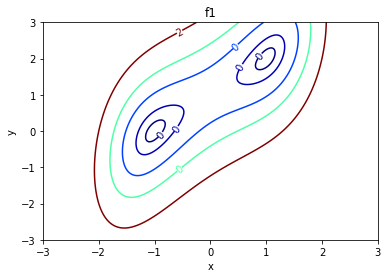

In [20]:
f1=lambda x,y:1/4*x**4+1/2*y**2-x*y+x-y
Df1=lambda x,y: np.array([x**3-y+1,y-x-1])

X=np.linspace(-3,3,300)
Y=np.linspace(-3,3,300)
Xmesh,Ymesh=np.meshgrid(X,Y)
Zmesh=f1(Xmesh,Ymesh)

CS = plt.contour(Xmesh, Ymesh, Zmesh, [-0.72,-0.6,-0.2,0.5,2], cmap='jet')
plt.clabel(CS,inline_spacing=0,fmt='%d')
plt.axis([-3,3,-3,3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('f1')

In [24]:
#DFP

x,y = 0,0    # initial point
path_DFP1 = [[x,y]]
tol = 1e-9            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df1(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f1,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df1(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2

    x,y = xnew,ynew
    dx = Df1(x,y)
    i += 1

path_DFP1=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f1(x,y)} at {x,y}')

After 13 iterations, approximate minimum is -0.75 at (-0.9999999999995338, 5.535653942888969e-13)


In [25]:
#DFP

x,y = 1.5,1    # initial point
path_DFP1 = [[x,y]]
tol = 1e-9            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df1(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f1,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP1.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df1(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2

    x,y = xnew,ynew
    dx = Df1(x,y)
    i += 1

path_DFP1=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f1(x,y)} at {x,y}')

After 15 iterations, approximate minimum is -0.7499999999999998 at (0.9999999999998476, 1.9999999999994833)


In [23]:
#BFGS

x0,y0=0,0

x,y = x0,y0    # initial point
path_BFGS = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df1(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f1,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df1(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df1(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f1(x,y)} at {x,y}')

After 10 iterations, approximate minimum is -0.7499999999999994 at (-1.0000000205491197, -3.662437061434102e-08)


In [25]:
#BFGS


x0,y0=1.5,1

x,y = x0,y0    # initial point
path_BFGS = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df1(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f1,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df1(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df1(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f1(x,y)} at {x,y}')

After 12 iterations, approximate minimum is -0.7499999999999987 at (0.9999999895408616, 2.0000000376962244)
